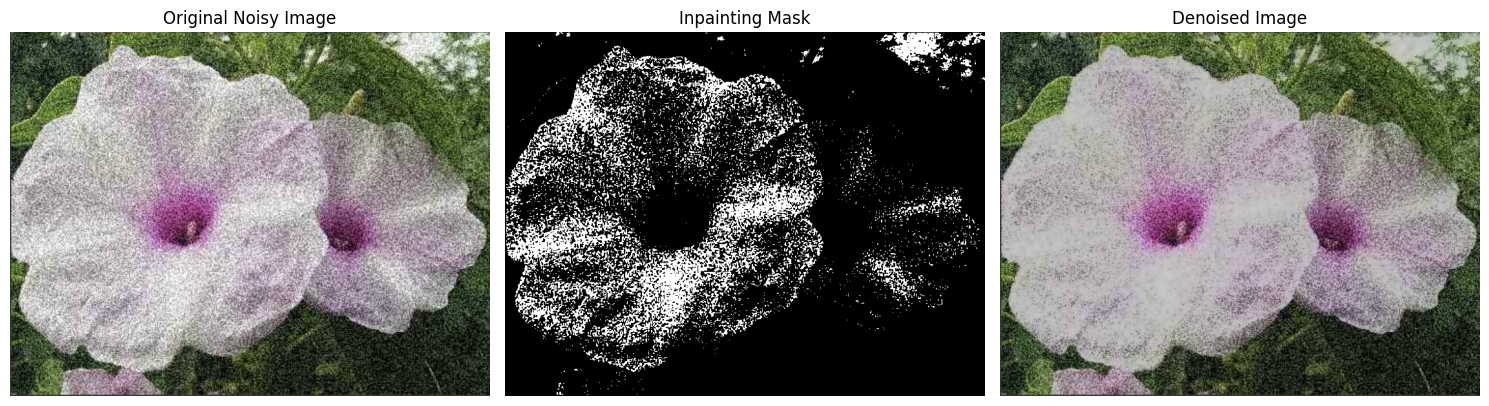

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the noisy image
image = cv2.imread('/content/noise-image.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold to create mask for inpainting
_, mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# Inpaint
restored = cv2.inpaint(image, mask, 3, cv2.INPAINT_TELEA)

# Convert BGR to RGB for matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
restored_rgb = cv2.cvtColor(restored, cv2.COLOR_BGR2RGB)

# Plot the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Inpainting Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(restored_rgb)
plt.title('Denoised Image')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


In [ ]:
img1 = cv2.imread('img1.png')
img2 = cv2.imread('img2.png')


In [ ]:
img1 = cv2.imread('/content/lab_almira.jpeg')
img2 = cv2.imread('/content/lab_chair.jpeg')


In [ ]:
# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Use BFMatcher to find matches
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)
matches


[< cv2.DMatch 0x7f7167177130>,
 < cv2.DMatch 0x7f7167175eb0>,
 < cv2.DMatch 0x7f7167175470>,
 < cv2.DMatch 0x7f7167176030>,
 < cv2.DMatch 0x7f7167174d90>,
 < cv2.DMatch 0x7f7167175090>,
 < cv2.DMatch 0x7f7167176a10>,
 < cv2.DMatch 0x7f7167177210>,
 < cv2.DMatch 0x7f7167177950>,
 < cv2.DMatch 0x7f7167174a90>,
 < cv2.DMatch 0x7f7167175db0>,
 < cv2.DMatch 0x7f7167174bd0>,
 < cv2.DMatch 0x7f7167174050>,
 < cv2.DMatch 0x7f7167174ed0>,
 < cv2.DMatch 0x7f7167176a70>,
 < cv2.DMatch 0x7f71671745b0>,
 < cv2.DMatch 0x7f71671744f0>,
 < cv2.DMatch 0x7f7167176890>,
 < cv2.DMatch 0x7f7167174e50>,
 < cv2.DMatch 0x7f7167176110>,
 < cv2.DMatch 0x7f7167174690>,
 < cv2.DMatch 0x7f7167177390>,
 < cv2.DMatch 0x7f71671743f0>,
 < cv2.DMatch 0x7f7167176af0>,
 < cv2.DMatch 0x7f71671777d0>,
 < cv2.DMatch 0x7f7167175e70>,
 < cv2.DMatch 0x7f7167176950>,
 < cv2.DMatch 0x7f71671761f0>,
 < cv2.DMatch 0x7f7167175970>,
 < cv2.DMatch 0x7f7167177790>,
 < cv2.DMatch 0x7f7167174ab0>,
 < cv2.DMatch 0x7f7167176830>,
 < cv2.D

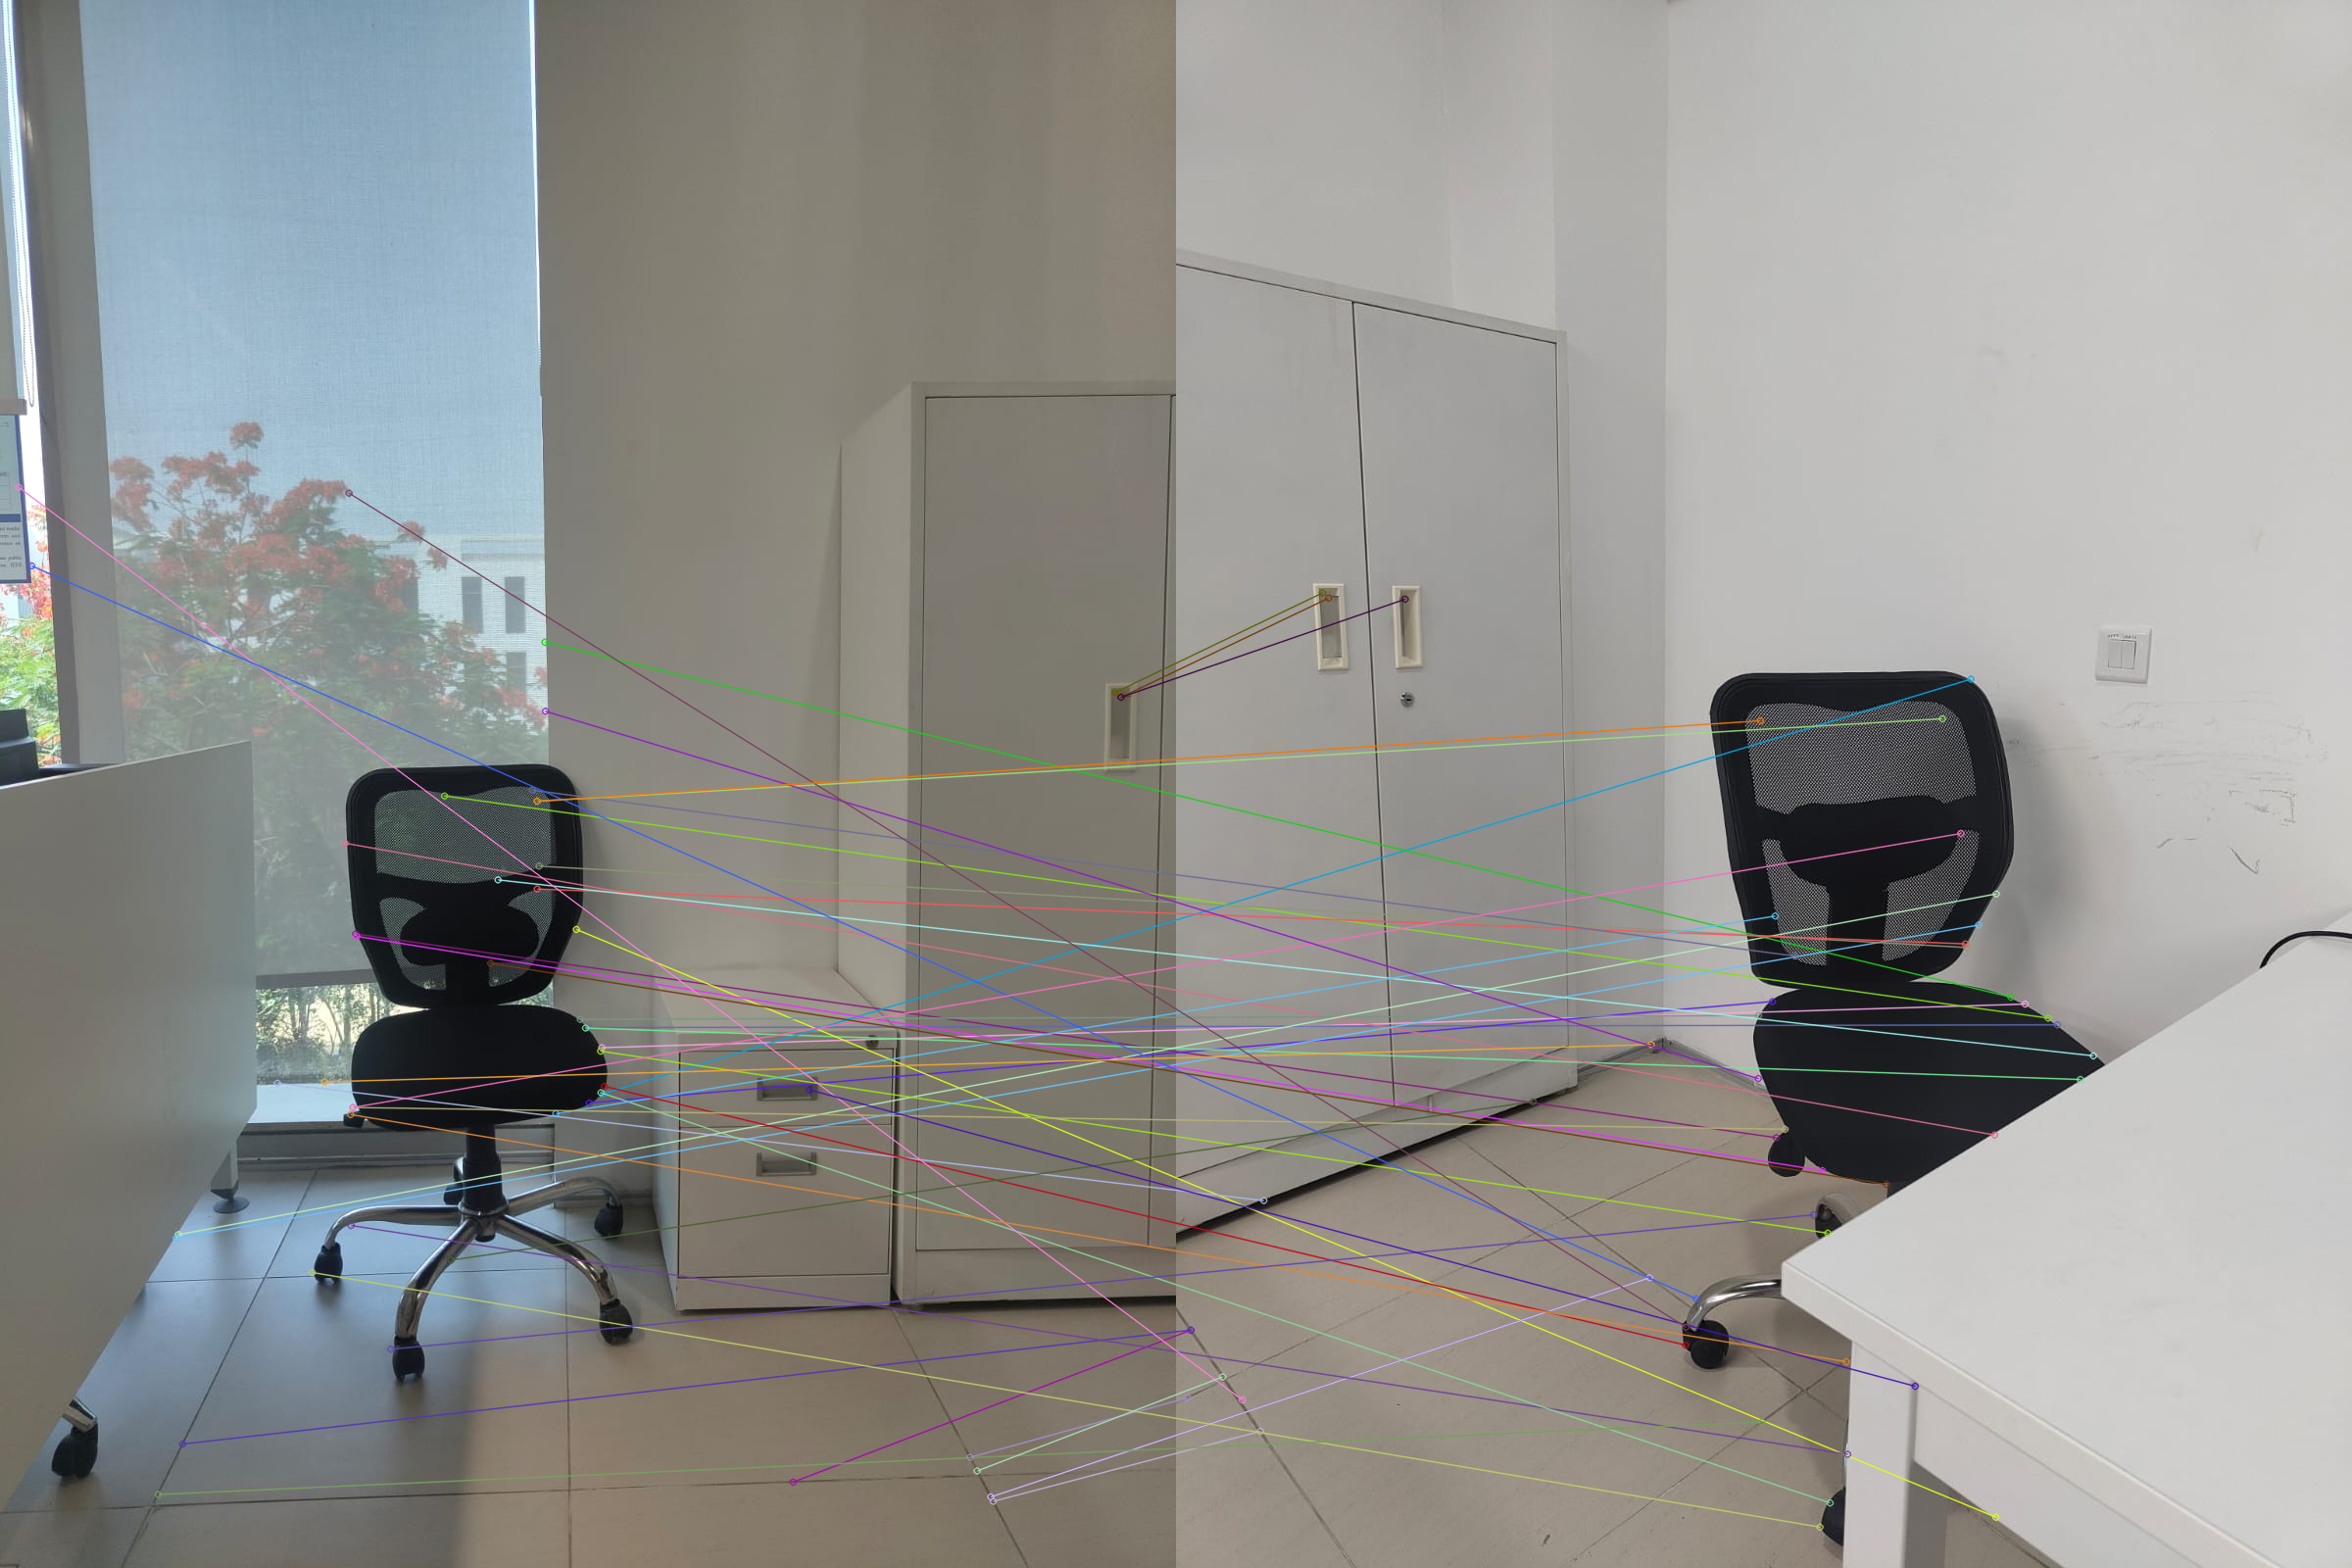

In [ ]:
img_matches = cv2.drawMatches(
    img1, kp1, img2, kp2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
cv2_imshow(img_matches)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np

# Load two consecutive views of the same scene
img1 = cv2.imread('/content/lab_almira.jpeg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/lab_chair.jpeg', cv2.IMREAD_GRAYSCALE)


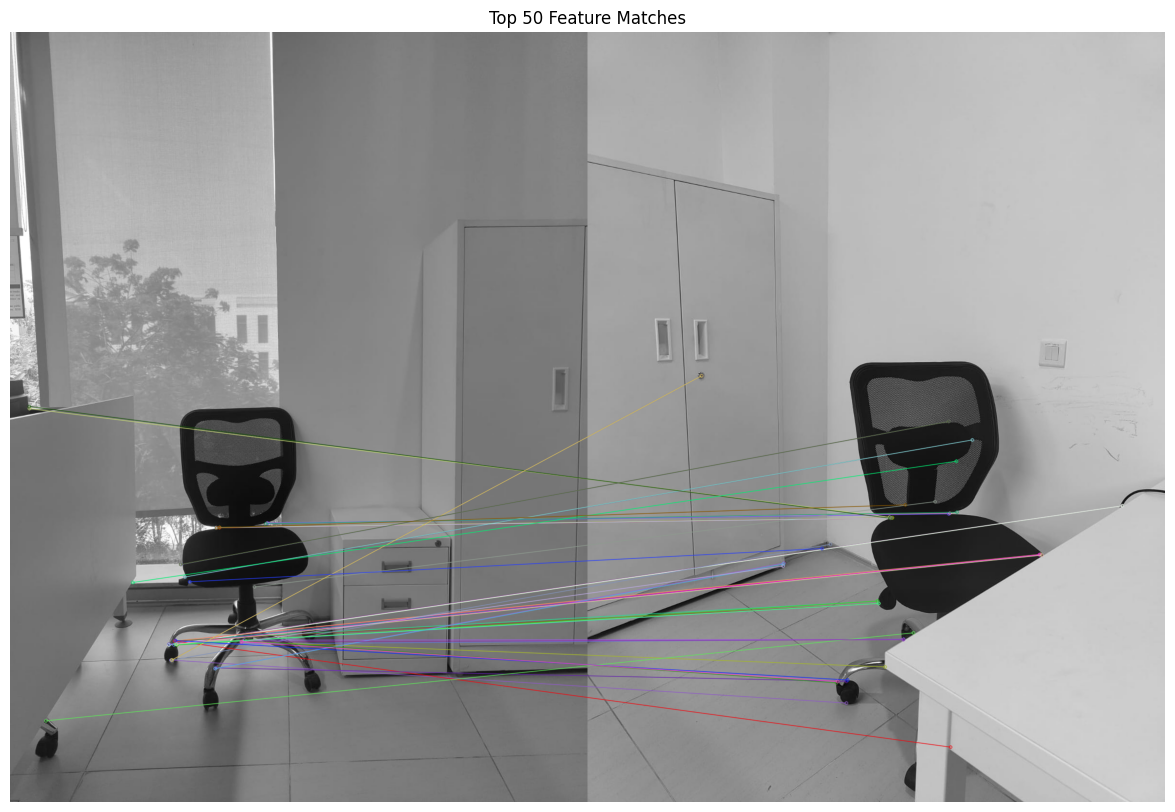

Rotation Matrix R:
 [[ 0.263202    0.81321607 -0.51904175]
 [-0.64489534  0.54845026  0.5322709 ]
 [ 0.71751983  0.19463284  0.66879246]]
Translation Vector t:
 [[-0.25621694]
 [-0.78011314]
 [-0.57076823]]
Sample 3D Points (X, Y, Z):
 [[ 0.05189889  0.05271472 -0.08789306  0.07267956 -0.03761973]
 [ 1.2334083   1.2385122   0.16501044  1.7627425   0.6786875 ]
 [ 0.8468606   0.84876955  0.18161331  1.2067372   0.45331898]]


In [ ]:
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

matched_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)
plt.figure(figsize=(20, 10))
plt.imshow(matched_img)
plt.title("Top 50 Feature Matches")
plt.axis("off")
plt.show()

# Camera Intrinsics (approx.)
K = np.array([[700, 0, 320],
              [0, 700, 240],
              [0,   0,   1]])

pts1 = np.float32([kp1[m.queryIdx].pt for m in matches])
pts2 = np.float32([kp2[m.trainIdx].pt for m in matches])

E, _ = cv2.findEssentialMat(pts1, pts2, K, method=cv2.RANSAC, prob=0.999, threshold=1.0)
_, R, t, _ = cv2.recoverPose(E, pts1, pts2, K)

print("Rotation Matrix R:\n", R)
print("Translation Vector t:\n", t)

# Triangulate Points
P0 = np.hstack((np.eye(3), np.zeros((3,1))))
P1 = np.hstack((R, t))

pts1_norm = cv2.undistortPoints(np.expand_dims(pts1, axis=1), K, None)
pts2_norm = cv2.undistortPoints(np.expand_dims(pts2, axis=1), K, None)

points_4d = cv2.triangulatePoints(P0, P1, pts1_norm, pts2_norm)
points_3d = points_4d / points_4d[3]

print("Sample 3D Points (X, Y, Z):\n", points_3d[:3, :5])


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


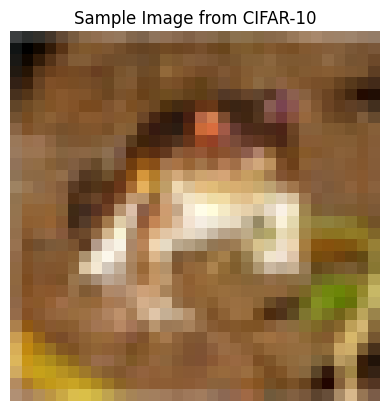

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist, cifar10
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset as an example
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize pixel values between [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Resize to (32, 32) if necessary (CIFAR-10 images are already 32x32)
# For MNIST: you might need to resize images to a similar size if you're using MNIST instead.

# Convert to grayscale if required (for simplicity in autoencoder example)
# If you are using MNIST, it is already in grayscale.
x_train_gray = np.dot(x_train[...,:3], [0.2989, 0.5870, 0.1140])  # Convert RGB to grayscale
x_test_gray = np.dot(x_test[...,:3], [0.2989, 0.5870, 0.1140])

# Rescale to [0, 1]
x_train_gray = x_train_gray / 255.0
x_test_gray = x_test_gray / 255.0

plt.imshow(x_train[0])
plt.title("Sample Image from CIFAR-10")
plt.axis('off')
plt.show()


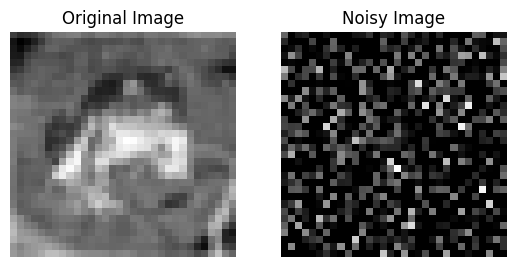

In [ ]:
import cv2

# Function to add Gaussian noise to an image
def add_gaussian_noise(img, mean=0, sigma=0.1):
    gaussian = np.random.normal(mean, sigma, img.shape)
    noisy = np.clip(img + gaussian, 0, 1)
    return noisy

# Function to add Salt and Pepper noise
def add_salt_pepper_noise(img, salt_prob=0.1, pepper_prob=0.1):
    noisy_img = np.copy(img)
    total_pixels = img.size
    num_salt = int(total_pixels * salt_prob)
    num_pepper = int(total_pixels * pepper_prob)

    # Salt noise (white pixels)
    salt_coords = [np.random.randint(0, i-1, num_salt) for i in img.shape]
    noisy_img[salt_coords[0], salt_coords[1]] = 1

    # Pepper noise (black pixels)
    pepper_coords = [np.random.randint(0, i-1, num_pepper) for i in img.shape]
    noisy_img[pepper_coords[0], pepper_coords[1]] = 0

    return noisy_img

# Apply Gaussian Noise and Salt & Pepper Noise
x_train_noisy = add_gaussian_noise(x_train_gray)
x_test_noisy = add_gaussian_noise(x_test_gray)

# Apply Salt and Pepper noise (optional)
# x_train_noisy = add_salt_pepper_noise(x_train_gray)
# x_test_noisy = add_salt_pepper_noise(x_test_gray)

plt.subplot(1, 2, 1)
plt.imshow(x_train_gray[0], cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(x_train_noisy[0], cmap='gray')
plt.title("Noisy Image")
plt.axis('off')

plt.show()


Found 824 images belonging to 5 classes.
Found 206 images belonging to 5 classes.
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

📦 Training MobileNet V1...



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 7/26 ━━━━━━━━━━━━━━━━━━━━ 16s 854ms/step - accuracy: 0.4243 - loss: 1.4636

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


14/26 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5426 - loss: 1.2070

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


26/26 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.6579 - loss: 0.9394 - val_accuracy: 0.9612 - val_loss: 0.1477
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9863 - loss: 0.0626 - val_accuracy: 0.9806 - val_loss: 0.1061
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 1.0000 - loss: 0.0118 - val_accuracy: 0.9903 - val_loss: 0.0602
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 1.0000 - loss: 0.0084 - val_accuracy: 0.9903 - val_loss: 0.0451
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 1.0000 - loss: 0.0076 - val_accuracy: 0.9903 - val_loss: 0.0382
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 0.9903 - val_loss: 0.0307
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.9951 - val_loss: 0.0267
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.9951 - val_loss: 0.0259
Epo

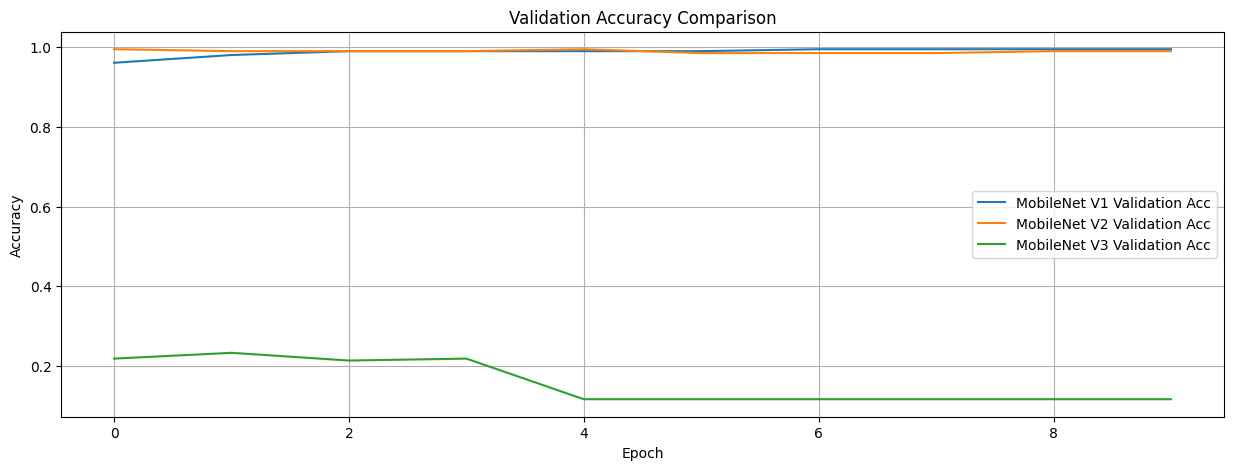

In [ ]:
import os
import kagglehub
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet, MobileNetV2, MobileNetV3Small
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Download datasets using kagglehub
gauravduttakiit_dogs_breed_dataset_path = kagglehub.dataset_download('gauravduttakiit/dogs-breed-dataset')
gauravduttakiit_mobilenet_v2_dog_classification_path = kagglehub.dataset_download('gauravduttakiit/mobilenet-v2-dog-classification')

# Set dataset paths
train_dir = os.path.join(gauravduttakiit_dogs_breed_dataset_path, "train")
valid_dir = os.path.join(gauravduttakiit_dogs_breed_dataset_path, "test")

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 5  # Adjust this based on the actual number of classes in the dataset

# Image generators
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(
    valid_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')

# Build model function
def build_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(NUM_CLASSES, activation='softmax')(x)
    return Model(inputs=base_model.input, outputs=predictions)

# Train function
def compile_and_train(model, version):
    model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    print(f"\n📦 Training MobileNet {version}...\n")
    history = model.fit(train_generator, epochs=EPOCHS, validation_data=valid_generator)
    return history

# Training all 3 models
histories = {}

# MobileNet V1
base_v1 = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_v1 = build_model(base_v1)
histories['MobileNet V1'] = compile_and_train(model_v1, 'V1')

# MobileNet V2
base_v2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_v2 = build_model(base_v2)
histories['MobileNet V2'] = compile_and_train(model_v2, 'V2')

# MobileNet V3
base_v3 = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_v3 = build_model(base_v3)
histories['MobileNet V3'] = compile_and_train(model_v3, 'V3')

# Plotting validation accuracy comparison
plt.figure(figsize=(15, 5))
for version, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{version} Validation Acc')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



Dataset downloaded at: /kaggle/input/brain-tumor-mri-dataset
Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - dice_coef: 0.8034 - iou: 0.7013 - loss: 0.8050 - val_dice_coef: 0.6875 - val_iou: 0.5245 - val_loss: 0.7862
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 218ms/step - dice_coef: 0.8661 - iou: 0.7936 - loss: 0.3542 - val_dice_coef: 0.9573 - val_iou: 0.9182 - val_loss: 0.1101
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 211ms/step - dice_coef: 0.9567 - iou: 0.9170 - loss: 0.1052 - val_dice_coef: 0.9689 - val_iou: 0.9396 - val_loss: 0.0769
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 220ms/step - dice_coef: 0.9669 - iou: 0.9359 - loss: 0.0764 - val_dice_coef: 0.9743 - val_iou: 0.9500 - val_loss: 0.0619
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 213ms/step - dice_coef: 0.9740 - iou: 0.9493 - loss: 0.0617 - val_dice_coef: 0.9794 - val_iou: 0.9596 - val_loss: 0.0504
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 222ms/step - dice_coef: 0.9790 - iou: 0.9589 - loss: 0.0498 - val_dice_coef: 0.9832 - v

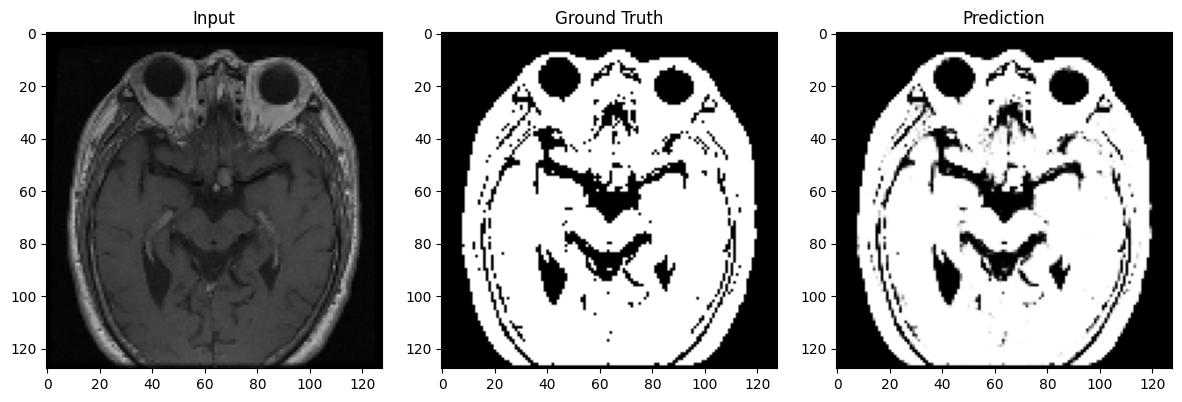

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import kagglehub
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, backend as K

# ========== STEP 1: Download Dataset using kagglehub ==========
dataset_path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")
print("Dataset downloaded at:", dataset_path)

# ========== STEP 2: Data Preparation ==========
IMG_SIZE = 128
CLASSES = ['glioma', 'meningioma', 'pituitary']  # skipping 'notumor' for segmentation

def load_images_and_masks(data_path, classes):
    images, masks = [], []
    for label in classes:
        folder = os.path.join(data_path, "Testing", label)
        for file in os.listdir(folder):
            img_path = os.path.join(folder, file)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Simulate binary mask: basic thresholding
            _, mask = cv2.threshold(gray, 40, 255, cv2.THRESH_BINARY)

            images.append(img / 255.0)
            masks.append(mask / 255.0)

    return np.array(images), np.expand_dims(np.array(masks), axis=-1)

images, masks = load_images_and_masks(dataset_path, CLASSES)
X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size=0.2, random_state=42)

# ========== STEP 3: Define U-Net ==========
def unet_model(input_size=(IMG_SIZE, IMG_SIZE, 3)):
    inputs = tf.keras.Input(input_size)

    def conv_block(x, filters):
        x = layers.Conv2D(filters, 3, activation='relu', padding='same')(x)
        x = layers.Conv2D(filters, 3, activation='relu', padding='same')(x)
        return x

    def encoder_block(x, filters):
        f = conv_block(x, filters)
        p = layers.MaxPooling2D((2, 2))(f)
        return f, p

    def decoder_block(x, skip, filters):
        x = layers.Conv2DTranspose(filters, (2, 2), strides=2, padding='same')(x)
        x = layers.Concatenate()([x, skip])
        x = conv_block(x, filters)
        return x

    # Encoder
    f1, p1 = encoder_block(inputs, 64)
    f2, p2 = encoder_block(p1, 128)
    f3, p3 = encoder_block(p2, 256)
    f4, p4 = encoder_block(p3, 512)

    bottleneck = conv_block(p4, 1024)

    # Decoder
    d1 = decoder_block(bottleneck, f4, 512)
    d2 = decoder_block(d1, f3, 256)
    d3 = decoder_block(d2, f2, 128)
    d4 = decoder_block(d3, f1, 64)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(d4)
    return models.Model(inputs, outputs)

# ========== STEP 4: Metrics ==========
def iou(y_true, y_pred):
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    intersection = K.sum(y_true * y_pred)
    union = K.sum(y_true) + K.sum(y_pred) - intersection
    return intersection / (union + K.epsilon())

def dice_coef(y_true, y_pred):
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    intersection = K.sum(y_true * y_pred)
    return (2. * intersection) / (K.sum(y_true) + K.sum(y_pred) + K.epsilon())

# ========== STEP 5: Training ==========
model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[iou, dice_coef])
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.1)

# ========== STEP 6: Evaluation ==========
loss, iou_score, dice_score = model.evaluate(X_test, y_test)
print(f"Test IoU: {iou_score:.4f}")
print(f"Test Dice: {dice_score:.4f}")

# ========== STEP 7: Visualize Predictions ==========
def plot_sample(img, mask, pred):
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    axs[0].imshow(img)
    axs[0].set_title("Input")
    axs[1].imshow(mask.squeeze(), cmap='gray')
    axs[1].set_title("Ground Truth")
    axs[2].imshow(pred.squeeze(), cmap='gray')
    axs[2].set_title("Prediction")
    plt.tight_layout()
    plt.show()

# Show sample prediction
sample_idx = np.random.randint(len(X_test))
sample_img = X_test[sample_idx]
sample_mask = y_test[sample_idx]
sample_pred = model.predict(np.expand_dims(sample_img, 0))[0]

plot_sample(sample_img, sample_mask, sample_pred)
